In [1]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

# And pandas for data import + sklearn because you allways need sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

!pip install transformers

pip install --user tensorflow-gpu==2.2.0

In [2]:
data1 = pd.read_excel (r'./Matric_Couverture3_evolution.xlsx', index_col=None, header=None)
data = pd.DataFrame(data1)
data = data.iloc[0:2]
data=data.transpose()
data = data[[1, 0]]
data.columns = ["texte", "Evolution"]
data=data.drop(index=0)
data

,texte,Evolution
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0
10,"Si la langue sélectionnée est espagnol, le sys...",0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["Evolution"].astype('category'), test_size=0.3, random_state=0)

In [4]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 100

In [5]:
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

In [6]:
# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)


In [7]:
# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [8]:
# Load the MainLayer
bert = transformer_model.layers[0]

In [9]:
# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
# attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
# inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
inputs = {'input_ids': input_ids}

In [10]:
inputs

{'input_ids': <tf.Tensor 'input_ids:0' shape=(None, 100) dtype=int32>}

In [11]:
# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

In [12]:
# Then build your model output
Evolution = Dense(units=len(y_train.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='Evolution')(pooled_output)
#product = Dense(units=len(data.Product_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='product')(pooled_output)
outputs = {'Evolution': Evolution}

In [13]:
# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')

In [14]:
# Take a look at the model
model.summary()

Model: "BERT_MultiLabel_MultiClass"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 100)]             0         
_________________________________________________________________
bert (TFBertMainLayer)       ((None, 100, 768), (None, 109482240 
_________________________________________________________________
pooled_output (Dropout)      (None, 768)               0         
_________________________________________________________________
Evolution (Dense)            (None, 4)                 3076      
Total params: 109,485,316
Trainable params: 109,485,316
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Set an optimizer
optimizer = Adam(
    learning_rate=1e-03,
    epsilon=1e-04,
    decay=0.01,
    clipnorm=1.0)

In [16]:
# Set loss and metrics
loss = {'Evolution': CategoricalCrossentropy(from_logits = True)}
metric = {'Evolution': CategoricalAccuracy('accuracy')}


In [17]:
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [18]:
# Tokenize the input (takes some time)
x = tokenizer(
    text=X_train.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [19]:
x

{'input_ids': <tf.Tensor: shape=(809, 96), dtype=int32, numpy=
array([[  101,  4649,  2531, ...,     0,     0,     0],
       [  101, 29536,  2271, ...,     0,     0,     0],
       [  101,  3393,  2291, ...,     0,     0,     0],
       ...,
       [  101, 25222,  4241, ...,     0,     0,     0],
       [  101, 11968, 13366, ...,     0,     0,     0],
       [  101,  6335, 21877, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(809, 96), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [20]:
# Tokenize the input (takes some time)
x_test = tokenizer(
    text=X_test.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [21]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [22]:
# Fit the model
history = model.fit(
    # x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    x={'input_ids': x['input_ids']},
    y={'Evolution': y_train},
#    validation_data=(x_test, y_test),
    validation_split=0.3,
    batch_size=64,
    epochs=10)

Epoch 1/10
9/9 [==============================] - 335s 37s/step - loss: 1.3519 - accuracy: 0.3322 - val_loss: 1.2061 - val_accuracy: 0.5021
Epoch 2/10
9/9 [==============================] - 324s 36s/step - loss: 1.1247 - accuracy: 0.3905 - val_loss: 1.1142 - val_accuracy: 0.3457
Epoch 3/10
9/9 [==============================] - 332s 37s/step - loss: 1.1369 - accuracy: 0.4152 - val_loss: 1.1490 - val_accuracy: 0.3457
Epoch 4/10
9/9 [==============================] - 332s 37s/step - loss: 1.1012 - accuracy: 0.4293 - val_loss: 1.1122 - val_accuracy: 0.3457
Epoch 5/10
9/9 [==============================] - 319s 35s/step - loss: 1.0929 - accuracy: 0.4329 - val_loss: 1.0917 - val_accuracy: 0.5021
Epoch 6/10
9/9 [==============================] - 307s 34s/step - loss: 1.1263 - accuracy: 0.4064 - val_loss: 1.1035 - val_accuracy: 0.3457
Epoch 7/10
9/9 [==============================] - 322s 36s/step - loss: 1.0928 - accuracy: 0.4170 - val_loss: 1.1399 - val_accuracy: 0.3457
Epoch 8/10
9/9 [====

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

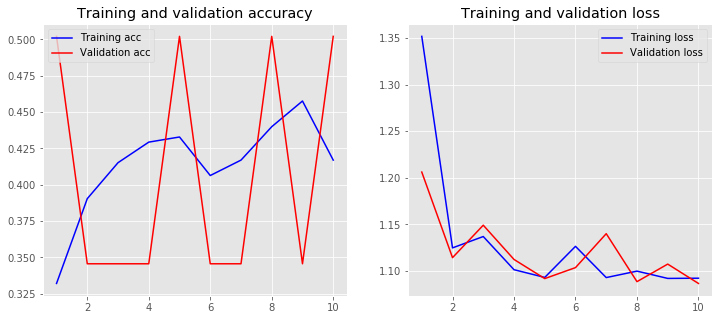

In [24]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))